In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow_decision_forests as tfdf 
from tensorflow.keras.models import load_model
import time 

2023-04-20 16:10:28.618239: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
test_starting_time = time.time()
test_df = pd.read_csv('../Data/binary_class/jet_images_c50_sort_hpT_pct_agg_test.csv', nrows = 10000)
test_load_time = time.time()-test_starting_time
print(f'Loaded testing sample of {len(test_df)} jets in {test_load_time:.3f}s')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label='class')

Loaded testing sample of 10000 jets in 72.556s


In [8]:
model = load_model('Models/Binary_class/small_tests/BDT_c50_hpT_pct_agg_10000/')

train_starting_time = time.time()
train_df = pd.read_csv('../Data/binary_class/jet_images_c50_sort_hpT_pct_agg_train.csv', nrows = 10000)
train_load_time = time.time()-train_starting_time
print(f'Loaded testing sample of {len(train_df)} jets in {train_load_time:.3f}s')

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label='class')

[INFO 2023-04-20T16:37:18.928786+02:00 kernel.cc:1214] Loading model from path Models/Binary_class/small_tests/BDT_c50_hpT_pct_agg_10000/assets/ with prefix 34672c82e3c94be3
[INFO 2023-04-20T16:37:19.087605+02:00 quick_scorer_extended.cc:873] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 2023-04-20T16:37:19.089493+02:00 abstract_model.cc:1312] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 2023-04-20T16:37:19.091091+02:00 kernel.cc:1046] Use fast generic engine


Loaded testing sample of 10000 jets in 87.157s


In [16]:
train_df[(list(train_df.columns)[:-1])]

,c0_px,c0_py,c0_pz,c0_E,c0_E_rel,c0_pT,c0_pT_rel,c0_eta,c0_eta_rel,c0_eta_rot,...,eta_sum,eta_rel_sum,eta_rot_sum,phi_sum,phi_rel_sum,phi_rot_sum,Delta_R_sum,cos_theta_sum,cos_theta_rel_sum,nb_constituents
0,116.493210,51.007256,-147.983688,195.119400,0.111154,127.170784,0.111410,-0.992500,0.001834,-0.0,...,-75.580651,0.983093,3.277846,35.221659,2.291462,-1.354696,7.783301,-57.728473,3.221443,77
1,-196.157028,-196.156998,-109.460121,298.222504,0.271597,277.407898,0.270786,-0.385000,-0.015373,-0.0,...,-9.317660,1.031907,0.853869,-65.699224,-0.221800,-1.220366,2.559931,-8.930806,0.840626,28
2,54.834553,-45.058983,-12.663929,72.093796,0.059279,70.972809,0.060611,-0.177500,0.036545,-0.0,...,-19.718937,3.397894,-9.194232,-84.214104,-1.074452,-3.656012,19.626254,-18.998244,-8.958590,108
3,-313.847809,-463.407196,251.213913,613.477844,0.521499,559.684448,0.525457,0.435000,-0.010916,0.0,...,9.894158,0.529925,-0.316172,-43.416551,0.992027,-2.185461,2.388175,9.166183,-0.296899,21
4,-7.727128,-217.255188,91.380798,235.817734,0.204280,217.392563,0.216643,0.408862,-0.122969,0.0,...,24.396925,-0.067300,0.870155,-73.895555,0.659594,-5.493093,6.049554,22.092123,0.844426,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,274.158997,387.857391,-88.371536,483.121155,0.444775,474.970001,0.448751,-0.185000,0.031005,-0.0,...,-11.491143,-2.850925,0.841248,37.532036,-0.410910,-4.050981,4.999876,-11.067171,0.821658,40
9996,72.602165,-141.416763,-9.797811,159.266418,0.162298,158.964691,0.162270,-0.061596,-0.012142,0.0,...,-0.981965,0.056571,0.294326,-23.065953,-0.097860,-0.112343,0.961230,-0.980603,0.293651,21
9997,48.302452,127.289230,-30.543001,139.529739,0.133480,136.145782,0.134911,-0.222500,0.032694,-0.0,...,-11.927035,-0.188113,-0.945168,58.581835,-0.547129,-3.320217,3.735191,-11.639613,-0.940586,46
9998,-582.317200,-164.387650,1070.027344,1229.257935,0.596974,605.075745,0.595563,1.335000,0.002811,-0.0,...,20.703376,-0.611649,0.211211,-45.306186,0.555054,-0.835840,1.670196,13.708247,0.209067,16


In [5]:
import dtreeviz

In [17]:
dtreeviz.model(model, X_train=train_df[(list(train_df.columns)[:-1])], y_train= train_df['class'])

ValueError: Tree model must be in (DecisionTreeRegressor, DecisionTreeClassifier, xgboost.core.Booster, lightgbm.basic.Booster, pyspark DecisionTreeClassificationModel, pyspark DecisionTreeClassificationModel, tensorflow_decision_forests.keras.RandomForestModel) but you passed a GradientBoostedTreesModel!

In [20]:
import os 
inspector_path = os.path.join('Models/Binary_class/BDT_c50_hpT_pct_agg/', "assets")
inspector = tfdf.inspector.make_inspector(inspector_path)

In [7]:
model.compile(metrics=["accuracy"])
evaluation = model.evaluate(test_ds, return_dict=True)

10/10 [==============================] - 19s 1s/step - loss: 0.0000e+00 - accuracy: 0.9290


In [8]:
y_pred = model.predict(test_ds)
# print(y_pred)
y_test = test_df['class']

10/10 [==============================] - 15s 1s/step


In [9]:
from sklearn.metrics import roc_curve, auc

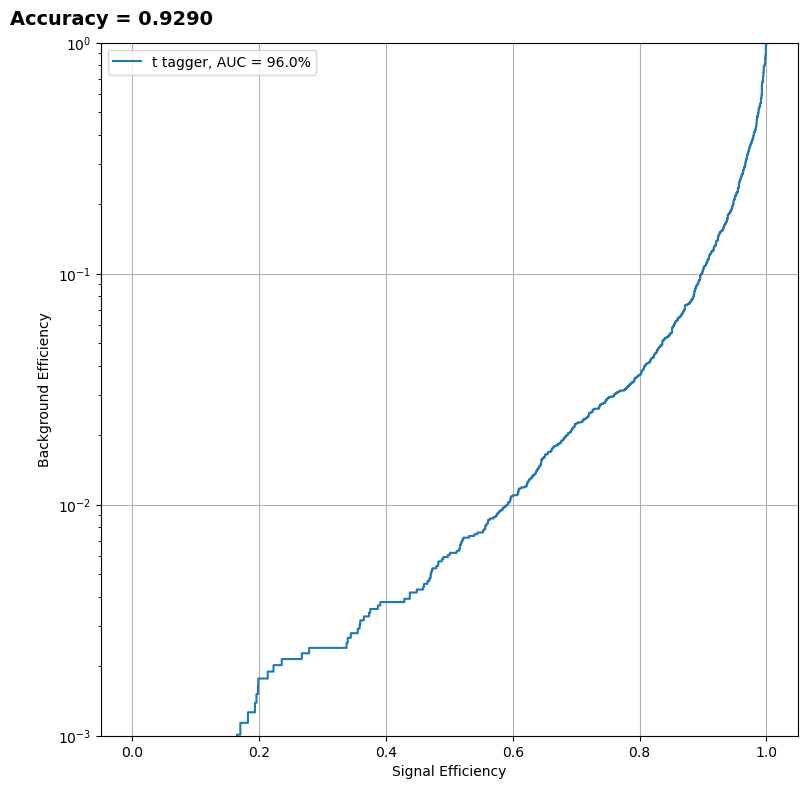

In [10]:
fpr, tpr, threshold = roc_curve(y_test,y_pred)
auc = auc(fpr,tpr)
#print('\n--------------------------------\n')

fig, ax = plt.subplots(figsize=(9, 9))
plt.plot(tpr,fpr, label = f't tagger, AUC = {auc*100:.1f}%')    
plt.semilogy()
plt.xlabel("Signal Efficiency")
plt.ylabel("Background Efficiency")
plt.ylim(0.001,1)
plt.grid(True)
plt.legend(loc='upper left')
plt.figtext(0.25, 0.90,f"Accuracy = {evaluation['accuracy']:.4f}",fontweight='bold', wrap=True, horizontalalignment='right', fontsize=14)
plt.show()

In [11]:
type(fpr)

numpy.ndarray

In [12]:
type(tpr)

numpy.ndarray

In [13]:
import pickle

In [15]:
np.save('fpr_savetest', fpr)
np.save('tpr_savetest', tpr)

In [17]:
new_fpr = np.load('fpr_savetest.npy', 'r')
new_tpr = np.load('tpr_savetest.npy', 'r')

In [22]:
evaluation_dict = {}

In [23]:
for name, value in evaluation.items():
    evaluation_dict[name] = value

In [24]:
evaluation_dict["model type"] = inspector.model_type()
evaluation_dict["number of trees"] = inspector.num_trees()
evaluation_dict["objective:"] =  inspector.objective()

In [25]:
print(evaluation_dict)

{'loss': 0.0, 'accuracy': 0.9290000200271606, 'model type': 'GRADIENT_BOOSTED_TREES', 'number of trees': 49, 'objective:': Classification(label=__LABEL, class=None, num_classes=2)}


In [26]:
with open('saved_dictionary.pkl', 'wb') as f:
    pickle.dump(evaluation_dict, f)

In [27]:
with open('saved_dictionary.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

In [28]:
print(loaded_dict)

{'loss': 0.0, 'accuracy': 0.9290000200271606, 'model type': 'GRADIENT_BOOSTED_TREES', 'number of trees': 49, 'objective:': Classification(label=__LABEL, class=None, num_classes=2)}


In [29]:
type(inspector)

tensorflow_decision_forests.component.inspector.inspector._GradientBoostedTreeInspector

2023-04-18 09:51:33.690992: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


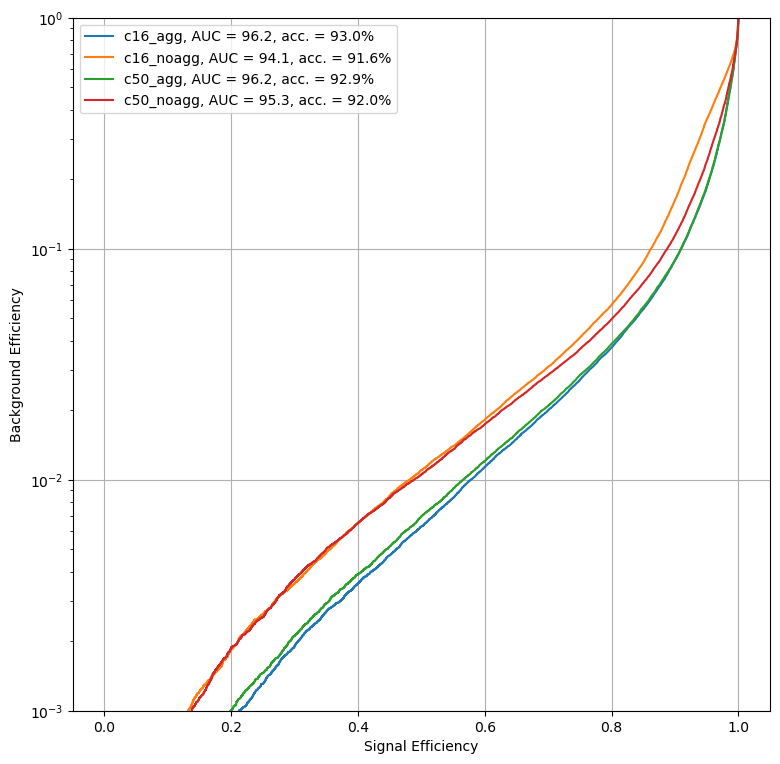

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os

constituents = [16,50]
labels = ['agg', 'noagg']

fig, ax = plt.subplots(figsize=(9, 9))
for c in constituents:
    for label in labels:
        fpr = np.load(f'Plots/ROCs/Binary_class/Evaluation_data/BDT_c{c}_hpT_pct_{label}_fpr.npy', 'r')
        tpr = np.load(f'Plots/ROCs/Binary_class/Evaluation_data/BDT_c{c}_hpT_pct_{label}_tpr.npy', 'r')

        with open(f'Plots/ROCs/Binary_class/Evaluation_data/BDT_c{c}_hpT_pct_{label}.pkl', 'rb') as f:
            evaluation_dictionary = pickle.load(f)

        plt.plot(tpr,fpr, label = f"c{c}_{label}, AUC = {evaluation_dictionary['auc']*100:.1f}, acc. = {evaluation_dictionary['accuracy']*100:.1f}%")    
plt.semilogy()
plt.xlabel("Signal Efficiency")
plt.ylabel("Background Efficiency")
plt.ylim(0.001,1)
plt.grid(True)
plt.legend(loc='upper left')
# plt.figtext(0.25, 0.90,f"Accuracy = {evaluation['accuracy']:.4f}",fontweight='bold', wrap=True, horizontalalignment='right', fontsize=14)
# plt.savefig(os.path.join(plot_output_dir, plot_name + ".pdf"))
plt.show()